In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [76]:
df = pd.read_csv("crypto-markets.csv", parse_dates=["date"], index_col="date")
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [77]:
df.shape

(942297, 12)

In [80]:
df = df[df['slug'] == 'litecoin']
df

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,litecoin,LTC,Litecoin,7,4.30,4.40,4.18,4.35,0.0,7.463694e+07,0.7727,0.22
2013-04-29,litecoin,LTC,Litecoin,7,4.37,4.57,4.23,4.38,0.0,7.538896e+07,0.4412,0.34
2013-04-30,litecoin,LTC,Litecoin,7,4.40,4.57,4.17,4.30,0.0,7.402092e+07,0.3250,0.40
2013-05-01,litecoin,LTC,Litecoin,7,4.29,4.36,3.52,3.80,0.0,6.560460e+07,0.3333,0.84
2013-05-02,litecoin,LTC,Litecoin,7,3.78,4.04,3.01,3.37,0.0,5.828798e+07,0.3495,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-25,litecoin,LTC,Litecoin,7,29.23,31.91,27.07,30.89,573938000.0,1.832206e+09,0.7893,4.84
2018-11-26,litecoin,LTC,Litecoin,7,30.87,32.11,28.38,29.41,528902000.0,1.744724e+09,0.2761,3.73
2018-11-27,litecoin,LTC,Litecoin,7,29.41,31.35,28.82,31.07,486621000.0,1.843430e+09,0.8893,2.53


In [82]:
df = df[["open"]]

In [83]:
df.tail()

,open
date,
2018-11-25,29.23
2018-11-26,30.87
2018-11-27,29.41
2018-11-28,31.12
2018-11-29,34.72


Text(0.5, 1.0, 'Price of Litecoin')

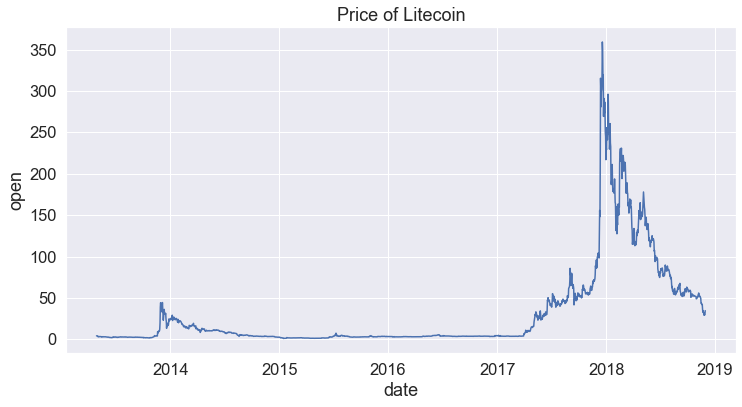

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="open", data=df).set_title("Price of Litecoin")

Text(0.5, 0.9, 'Down-sampled to 10-day periods')

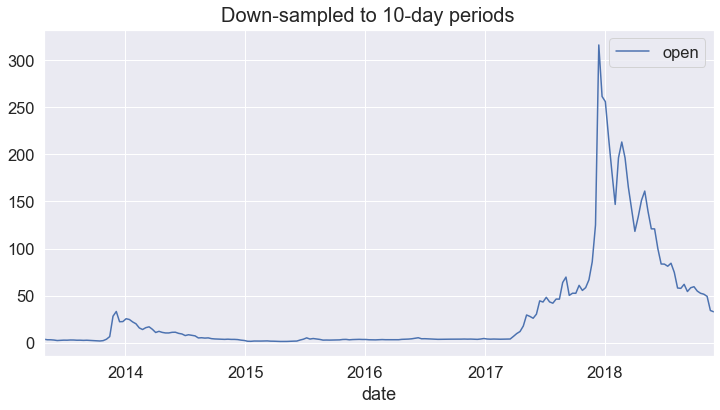

In [85]:

df.resample('10D').mean().plot(figsize=(12,6))
plt.figtext(.5,0.9,"Down-sampled to 10-day periods", fontsize=20, ha='center')

In [86]:
data = df.iloc[:, 0]

In [88]:
hist = []
target = []
length = 90

for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [91]:
print(len(hist[0]))
print(len(hist))
print(len(target))

90
1952
1952


In [92]:
print(hist[0][89])
print(data[89])

2.98
2.98


In [94]:
print(type(hist), type(target))

<class 'list'> <class 'list'>


In [95]:
#convert list to array
hist = np.array(hist)
target = np.array(target)

In [96]:
print(type(hist), type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [97]:
hist.shape

(1952, 90)

In [99]:
target.shape

(1952,)

In [100]:
target = target.reshape(-1,1)
target.shape

(1952, 1)

In [101]:
#Normalize the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [102]:
#Reshape the input
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

(1952, 90, 1)


In [103]:
X_train = hist_scaled[:1900,:,:]
X_test = hist_scaled[1900:,:,:]

y_train = target_scaled[:1900,:]
y_test = target_scaled[1900:,:]

In [104]:
import tensorflow as tf

from tensorflow.keras import layers

In [105]:
model = tf.keras.Sequential()

model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))

model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))

model.add(layers.LSTM(units=32, dropout=0.2))

model.add(layers.Dense(units=1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [107]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
60/60 [==============================] - 4s 64ms/step - loss: 0.0050
Epoch 2/30
60/60 [==============================] - 4s 60ms/step - loss: 0.0022
Epoch 3/30
60/60 [==============================] - 4s 59ms/step - loss: 0.0023
Epoch 4/30
60/60 [==============================] - 4s 59ms/step - loss: 0.0022
Epoch 5/30
60/60 [==============================] - 3s 58ms/step - loss: 0.0017
Epoch 6/30
60/60 [==============================] - 3s 58ms/step - loss: 0.0020
Epoch 7/30
60/60 [==============================] - 3s 58ms/step - loss: 0.0018
Epoch 8/30
60/60 [==============================] - 3s 57ms/step - loss: 0.0017
Epoch 9/30
60/60 [==============================] - 3s 56ms/step - loss: 0.0018
Epoch 10/30
60/60 [==============================] - 3s 57ms/step - loss: 0.0017
Epoch 11/30
60/60 [==============================] - 3s 58ms/step - loss: 0.0018
Epoch 12/30
60/60 [==============================] - 4s 60ms/step - loss: 0.0015
Epoch 13/30
60/60 [==================

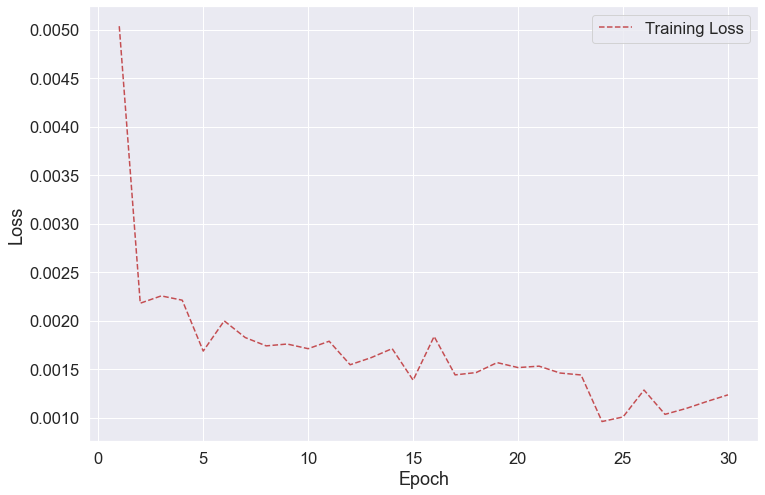

In [108]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [109]:
pred = model.predict(X_test)

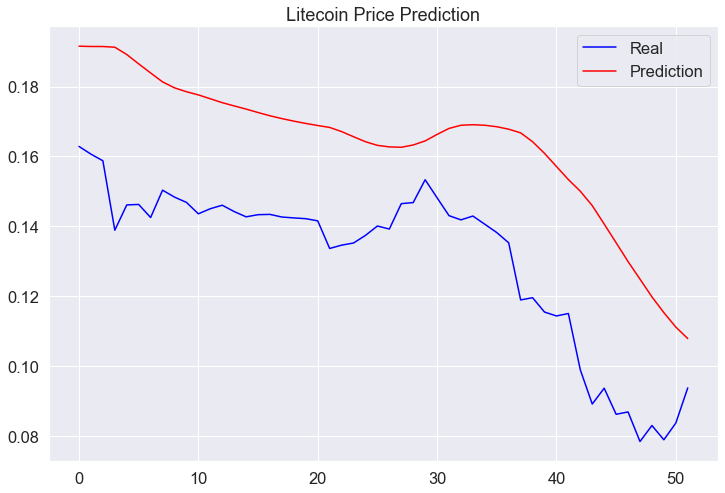

In [110]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [111]:

pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

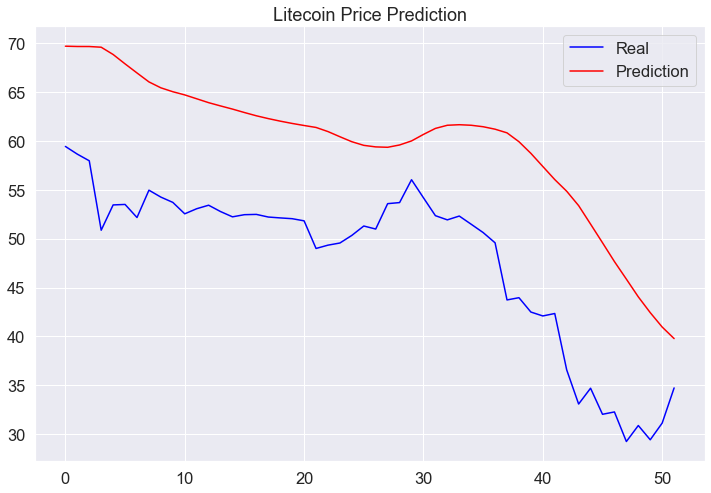

In [112]:

plt.figure(figsize=(12,8))
plt.plot(y_test_transformed, color='blue', label='Real')
plt.plot(pred_transformed, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()